# Precipitation Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
session = Session(engine)

In [4]:
results = (session
           .query(Measurement.date, Measurement.prcp)
           .order_by(Measurement.date.desc())
           .limit(10)
           .all())
results

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', 0.56)]

In [5]:
#calculate the min date and max date values, just to know how long
#I can go back 12 months
max_date = (session
           .query(func.max(Measurement.date))
           .all())
min_date = (session
           .query(func.min(Measurement.date))
           .all())
print(max_date, min_date)

#retrieve the date and prcp values of last 12 months
results = (session
           .query(Measurement.date, Measurement.prcp)
           .filter(Measurement.date < '2017-08-24')
           .filter(Measurement.date > '2016-08-01')
           .order_by(Measurement.date.desc())
           .all())
results

[('2017-08-23',)] [('2010-01-01',)]


[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-12', 0.14),
 ('2017-08-11', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-

In [6]:
#calculate average by date results: only to make it smaller 
results = (session
           .query(Measurement.date, func.avg(Measurement.prcp))
           .filter(Measurement.date < '2017-08-24')
           .filter(Measurement.date > '2016-08-01')
           .group_by(Measurement.date)
           #.order_by(Measurement.date.desc())
           .all())
results
#
#Load the query results into a Pandas DataFrame and set the index to the date column.
precipitation_df = pd.DataFrame(results, columns=['date','prcp'])
precipitation_df.set_index('date', inplace=True, )
precipitation_df.head(10)

,prcp
date,
2016-08-02,0.405714
2016-08-03,0.008333
2016-08-04,0.362000
2016-08-05,0.068000
2016-08-06,0.062500
2016-08-07,0.556667
2016-08-08,0.110000
2016-08-09,0.098333
2016-08-10,0.000000


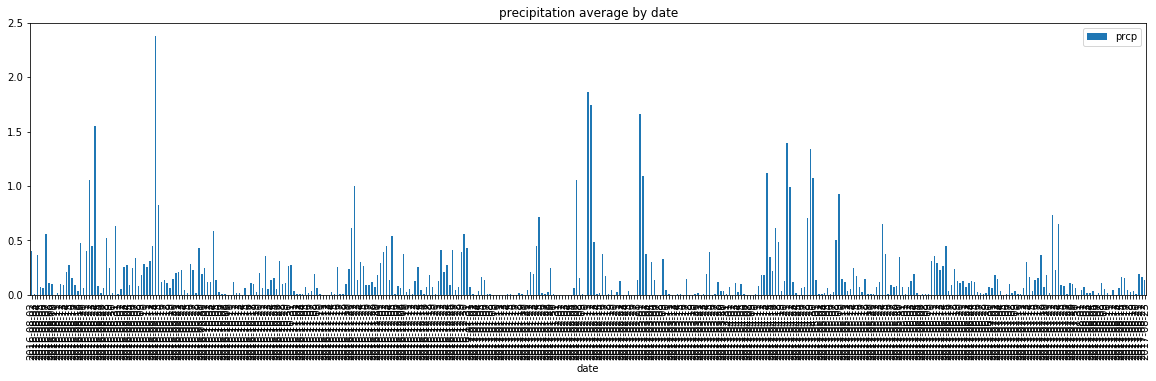

In [7]:
# Plot the dataframe as a bar chart using pandas plotting
#precipitation_df.iloc[::].plot(kind='bar', title='precipitation average by date', width=10.0, align='center', alpha=0.75)
precipitation_df.plot(kind='bar',figsize=(20,5))
plt.title('precipitation average by date')
plt.show()

# Station Analysis


In [8]:
Station = Base.classes.station
session = Session(engine)
results = (session
           .query(Station.id, Station.name, Station.latitude, Station.longitude, Station.elevation)
           .all())
results


[(1, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 (8, 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [9]:
# Design a query to calculate the total number of station
results = (session
           .query(func.count(Station.id))
           .all())
print(f'There is {results} stations')

There is [(9,)] stations


In [10]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
results = (session
          .query(Station.name, func.count(Measurement.tobs))
          .filter(Station.station == Measurement.station)
           .group_by(Station.name)
          .order_by(func.count(Measurement.tobs).desc())
           .all()
          )
results


[('WAIHEE 837.5, HI US', 2772),
 ('KANEOHE 838.1, HI US', 2696),
 ('WAIKIKI 717.2, HI US', 2685),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('MANOA LYON ARBO 785.2, HI US', 2484),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('PEARL CITY, HI US', 683),
 ('UPPER WAHIAWA 874.3, HI US', 342)]

In [22]:
# Which station has the highest number of observations?
results = (session
          .query(Station.station, func.count(Measurement.tobs))
          .filter(Station.station == Measurement.station)
           .group_by(Station.station)
           .order_by(func.count(Measurement.tobs).desc())
           .first()
          )
#results
print(f'The highest number of observation station: {results}')

The highest number of observation station: ('USC00519281', 2772)


In [12]:
import matplotlib.mlab as mlab
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
#
results = (session
           .query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)
           .filter(Measurement.date < '2017-08-24')
           .filter(Measurement.date > '2016-08-01')
           #.order_by(Measurement.date.desc())
           .all())
results

[('USC00519397', '2016-08-02', 0.05, 78),
 ('USC00519397', '2016-08-03', 0.0, 80),
 ('USC00519397', '2016-08-04', 0.04, 80),
 ('USC00519397', '2016-08-05', 0.01, 80),
 ('USC00519397', '2016-08-06', 0.0, 80),
 ('USC00519397', '2016-08-07', 0.39, 77),
 ('USC00519397', '2016-08-08', 0.02, 81),
 ('USC00519397', '2016-08-09', 0.0, 80),
 ('USC00519397', '2016-08-10', 0.0, 80),
 ('USC00519397', '2016-08-11', 0.0, 80),
 ('USC00519397', '2016-08-12', 0.0, 79),
 ('USC00519397', '2016-08-13', 0.0, 79),
 ('USC00519397', '2016-08-14', 0.0, 79),
 ('USC00519397', '2016-08-15', 0.0, 79),
 ('USC00519397', '2016-08-16', 0.0, 80),
 ('USC00519397', '2016-08-17', 0.0, 78),
 ('USC00519397', '2016-08-18', 0.0, 80),
 ('USC00519397', '2016-08-19', 0.04, 77),
 ('USC00519397', '2016-08-20', 0.0, 80),
 ('USC00519397', '2016-08-21', 0.12, 76),
 ('USC00519397', '2016-08-22', 0.4, 77),
 ('USC00519397', '2016-08-23', 0.0, 81),
 ('USC00519397', '2016-08-24', 0.08, 79),
 ('USC00519397', '2016-08-25', 0.08, 80),
 ('USC0

In [28]:
#Filter by the station with the highest number of observations.
results = (session
           .query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)
           .filter(Measurement.date < '2017-08-24')
           .filter(Measurement.date > '2016-08-01')
           .filter(Measurement.station == 'USC00519281')
           .all())
results

[('USC00519281', '2016-08-02', 0.83, 76),
 ('USC00519281', '2016-08-03', 0.01, 77),
 ('USC00519281', '2016-08-04', 0.77, 77),
 ('USC00519281', '2016-08-05', 0.27, 81),
 ('USC00519281', '2016-08-06', 0.14, 78),
 ('USC00519281', '2016-08-07', 0.47, 78),
 ('USC00519281', '2016-08-08', 0.28, 81),
 ('USC00519281', '2016-08-09', 0.02, 81),
 ('USC00519281', '2016-08-10', 0.0, 82),
 ('USC00519281', '2016-08-11', 0.01, 80),
 ('USC00519281', '2016-08-12', 0.02, 76),
 ('USC00519281', '2016-08-13', 0.08, 80),
 ('USC00519281', '2016-08-14', 0.1, 76),
 ('USC00519281', '2016-08-15', 0.23, 75),
 ('USC00519281', '2016-08-16', 0.12, 74),
 ('USC00519281', '2016-08-17', 0.31, 82),
 ('USC00519281', '2016-08-18', 0.0, 80),
 ('USC00519281', '2016-08-19', 0.31, 79),
 ('USC00519281', '2016-08-20', 0.13, 81),
 ('USC00519281', '2016-08-21', 0.08, 79),
 ('USC00519281', '2016-08-22', 2.32, 78),
 ('USC00519281', '2016-08-23', 1.79, 77),
 ('USC00519281', '2016-08-24', 2.15, 77),
 ('USC00519281', '2016-08-25', 0.06, 

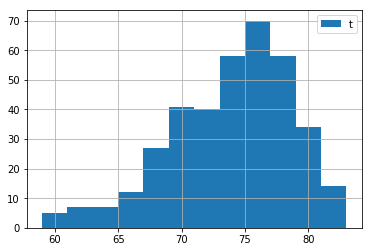

In [34]:
listm = []
for row in results:
    listm.append(row)

nbins =12
res_df = pd.DataFrame(l)
res_df.head()

nbins =12
plt.hist(res_df['tobs'], nbins, histtype='bar', stacked=True)
plt.legend('tobs')
plt.grid(True)
plt.show()

In [35]:
# Testing calculate minimum, maximum, and average temperature in a function
def calc_temp(start_date, end_date):
    results = (session
           .query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
           .filter(Measurement.date >= '2017-01-01')
           .filter(Measurement.date <= '2017-12-31')
           .all())
    return results 
    


[(58, 87, 74.02052091554854)]